<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Machine-Learning-Projects/blob/master/End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Set up the programming enviroment

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tarfile
import hashlib
import pandas as pd
from six.moves import urllib
!pip install -U scikit-learn

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)


## Get the data...


Specify the directory path where the data is located...

In [0]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [0]:
fetch_housing_data()

Define a routine to read the 'housing.csv' file.

In [0]:
def load_housing_data(housing_path = HOUSING_PATH): 
  csv_path = os.path.join( housing_path, "housing.csv") 
  return pd.read_csv(csv_path)

Load and preview the 'housing.csv' file..


In [0]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Info about each of the attributes. Notice that the 'total_bedrooms' attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.



In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88188db5c0>,
      dtype=object)

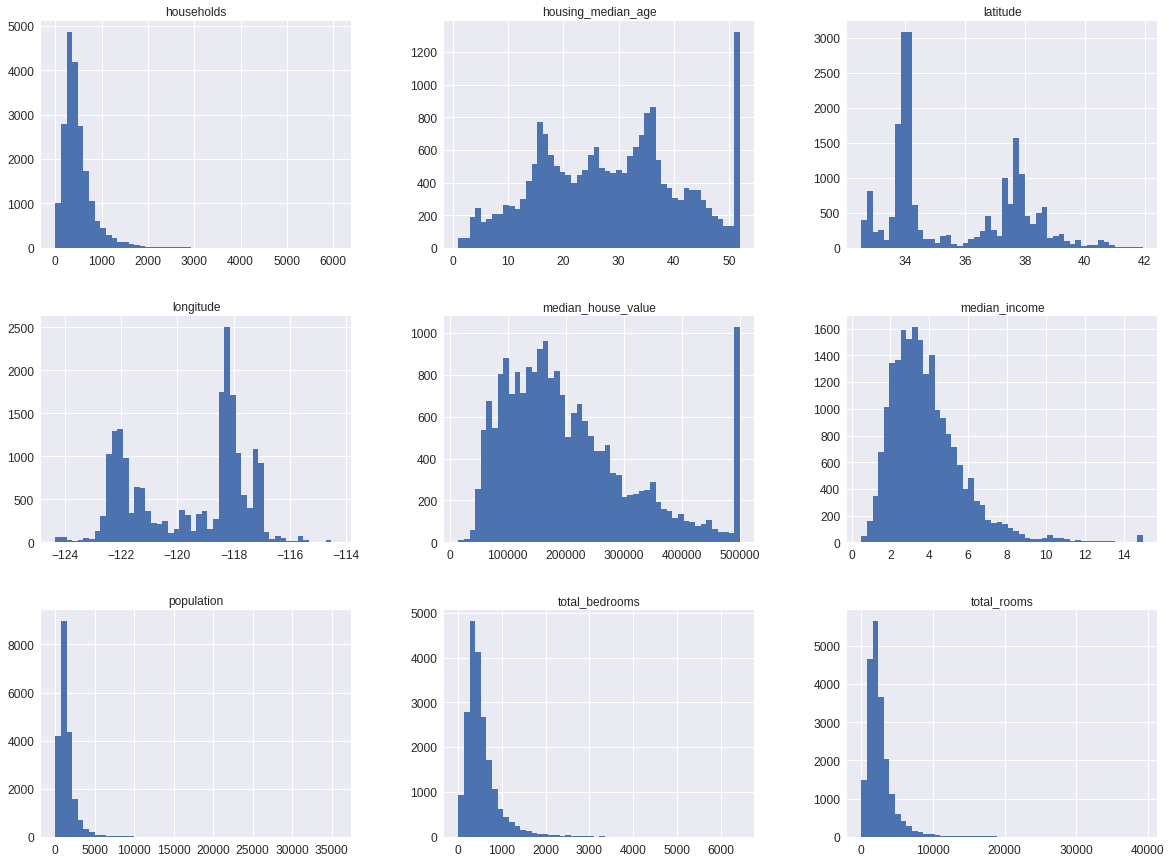

In [0]:
housing.hist(bins=50,figsize=(20,15))
# plt.show()

Now we need to set aside 20% of the dataset as our test set.

In [0]:
def split_train_test(data, test_ratio): 
  np.random.seed(42)                                               # Ensure we generate the same shuffled indices
  shuffled_indices = np.random.permutation(len(data))              # Shuffle the indices of the dataset
  test_set_size = int(len(data)*test_ratio)                        # Determine size of test set
  test_indices = shuffled_indices[:test_set_size]                  # Determine indices of test set
  train_indices = shuffled_indices[test_set_size:]                 # Training set has the remaining indices
  return data.iloc[train_indices], data.iloc[test_indices]         # Populate the training/test sets using the appropriate indices

In [0]:
train_set, test_set = split_train_test(housing,test_ratio=0.2)
print(len(train_set), len(test_set))

16512 4128


The following code ensures that, when we get new data, we add the appropriate amounts to the train and test sets. It also makes sure we don't move previous training samples over to the test set.

In [0]:
def test_set_check(identifier, test_ratio, hash): 
  return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio 

In [0]:
def split_train_test_by_id(data,test_ratio,id_column,hash = hashlib.md5): 
  ids = data[id_column] 
  in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio,hash)) 
  return data.loc[ ~ in_test_set], data.loc[ in_test_set]

In [0]:
housing_with_id = housing.reset_index()          # adds an ` index ` column 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

If we use the row index as a unique identifier, we need to make sure that new data gets appended to the end of the dataset, and no row ever gets deleted. If this is not possible, then we can try to use the most stable features to build a unique identifier. For example, a district’s latitude and longitude are guaranteed to be stable for a few million years, so we could combine them to create a unique ID like so:



In [0]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"] 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Or...we could call the 'train_test_split' routine from sklearn to parse our data.

In [0]:
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

We have been told that the 'median_income' attribute is very important when predicting median housing prices.  Let's look at that attribute in more detail.

In [0]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

The following code creates an income category attribute by dividing the median income by 1.5 to limit the number of income categories.  

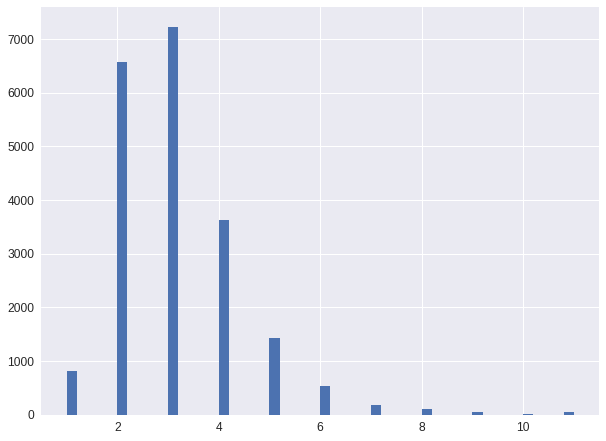

In [0]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].value_counts()
housing['income_cat'].hist(bins=50,figsize=(10,7.5))

Next, we will round up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5:

[0.5, 5, 0, 8000]

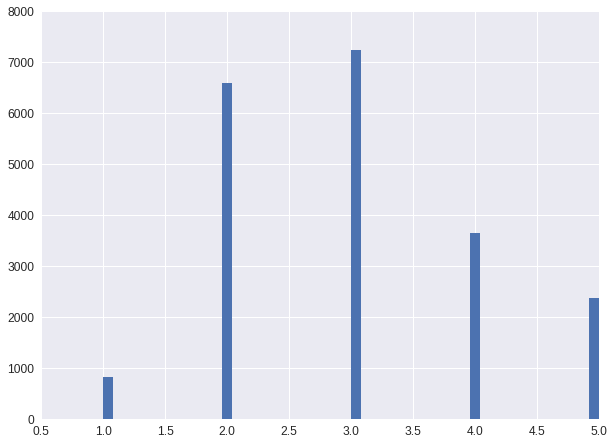

In [0]:
# Keep all values < 5 and replace all values > 5 with the number 5.

housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True) 
housing['income_cat'].hist(bins=50,figsize=(10,7.5))
plt.axis([0.5, 5, 0, 8000])

Let's apply the Stratified ShuffleSplit cross-validator from sklearn. It provides train/test indices to split data in train/test sets.

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit 

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['income_cat']): 
  strat_train_set = housing.loc[train_index] 
  strat_test_set = housing.loc[test_index]

Let’s see if this worked as expected. We can start by looking at the income category proportions in the test set:


In [0]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set) 

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Let's repeat this analysis to measure the income category proportions in the full dataset. We will see that the value distribution of the total dataset is correctly represented in the stratified test set.  **StratifiedShuffleSplit** is a great function!!

In [0]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

We're done looking at the 'income_cat' attribute, so let's delete it and get the 'housing' dataframe back to its original shape.

In [0]:
list(housing.columns.values)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'income_cat']

In [0]:
housing = housing.drop('income_cat',axis=1)     # delete the attribute 'income_cat'
  

We verify that the attribute 'income_cat' has been deleted (and it has...).

In [0]:
list(housing.columns.values)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

So far we have only taken a quick glance at the data to get a general understanding of the kind of data we are manipulating. Now the goal is to go a little bit more in depth. First, let's make sure we have put the test set aside and we are only exploring the training set. Also, if the training set is very large, we may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so we can just work directly on the full set. Let’s create a copy so we can play with it without harming the training set:


In [0]:
housing=strat_train_set.copy()
housing = housing.drop('income_cat',axis=1)     # delete the attribute 'income_cat'
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


Let's plot the geographical data...

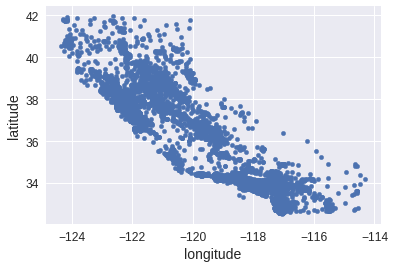

In [0]:
housing.plot(kind ="scatter", x ="longitude", y ="latitude") 

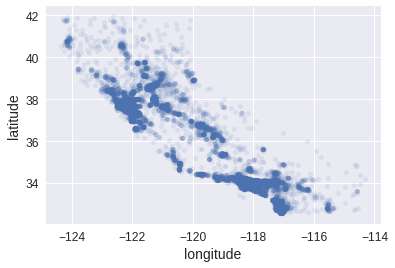

In [0]:
housing.plot(kind ="scatter", x ="longitude", y ="latitude",alpha=0.1)

Now let’s look at the housing prices. The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high values).


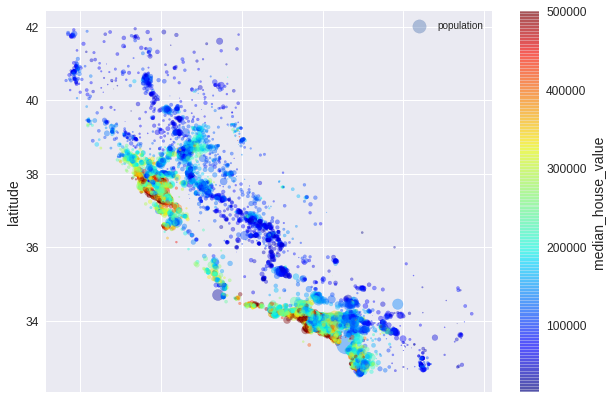

In [0]:
housing.plot(kind ="scatter", x ="longitude", y ="latitude", 
             alpha = 0.4, s=housing["population"]/100, label ="population", 
             figsize =(10,7), c ="median_house_value", cmap=plt.get_cmap("jet"), 
             colorbar = True,) 
plt.legend()

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:

In [0]:
corr_matrix = housing.corr()

Now let’s look at how much each attribute correlates with the median house value:

In [0]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, we would get $(11)^2 = 121$ plots, which would not fit on a page, so let’s just focus on a few promising attributes that seem most correlated with the median housing value.
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8813c87550>,
      dtype=object)

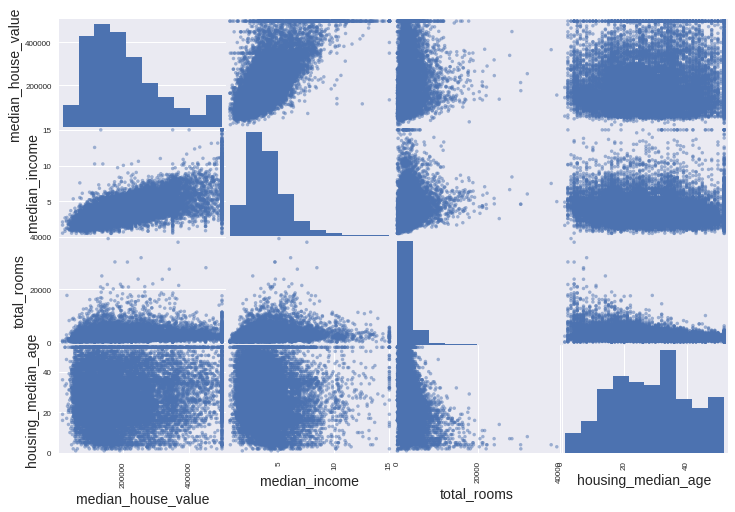

In [0]:
from pandas.plotting import scatter_matrix 
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age'] 
scatter_matrix(housing[attributes], figsize =( 12, 8)) 

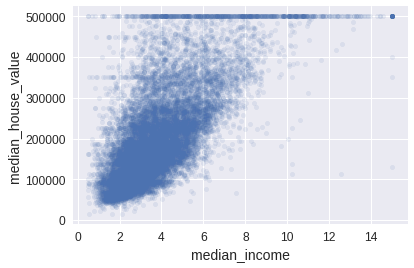

In [0]:
housing.plot(kind ="scatter", x ="median_income", y ="median_house_value", alpha = 0.1) 

This plot reveals a few things. First, the correlation is indeed very strong; we can clearly see the upward trend and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at USD 500,000. But this plot reveals other less obvious straight lines: a horizontal line around USD 450,000, another around USD 350,000, perhaps one around USD 280,000, and a few more below that. We may want to try removing the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

Let's look at some other newly-generated attributes...

In [0]:
housing["rooms_per_household"] = housing["total_rooms"]/ housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/ housing["total_rooms"] 
housing["population_per_household"] = housing["population"]/housing["households"]
 

Recalculate the correlation matrix...

In [0]:
corr_matrix = housing.corr()

In [0]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new 'bedrooms_per_room attribute' is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of 'rooms per household' is also more informative than the total number of rooms in a district — obviously the larger the houses, the more expensive they are. This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help us get a first reasonably good prototype. But this is an iterative process: once we get a prototype up and running, we can analyze its output to gain more insights and come back to this exploration step.

First let’s revert to a clean training set (by copying strat_train_set once again), and let’s separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that drop() creates a copy of the data and does not affect strat_train_set):


In [0]:
housing = strat_train_set.drop("income_cat", axis = 1)              # Remove the 'income_cat' attribute
housing = housing.drop("median_house_value", axis = 1)              # Remove the 'median_house_value' attribute
housing_labels = strat_train_set["median_house_value"].copy()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


Now we need to deal with missing data in the dataset. Scikit-Learn provides a handy class to take care of missing values: **Imputer**. Here is how to use it. First, we need to create an Imputer instance, specifying that we want to replace each attribute’s missing values with the median of that attribute:



In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute 'ocean_proximity':


In [0]:
housing_num=housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [0]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [0]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now we can use this “trained” imputer to transform the training set by replacing missing values by the learned medians: The result is a plain Numpy array containing the transformed features.  


In [0]:
X = imputer.transform(housing_num) 

If we want to put it back into a Pandas DataFrame, it’s simple:

In [0]:
housing_tr = pd.DataFrame(X,columns = housing_num.columns)

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median:

In [0]:
housing_cat=housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

Let’s convert these categories from text to numbers. For this, we can use the sklearn function **OrdinalEncoder** which encodes categorical features as an integer array.

In [0]:
from sklearn.preprocessing import OrdinalEncoder

In [0]:
housing_cat=housing_cat.reshape(-1,1)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [0]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Scikit-Learn provides a **OneHotEncoder** encoder to convert integer categorical values into one-hot vectors. Let’s encode the categories as one-hot vectors:


In [0]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Note that fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it. Also, notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when we have categorical attributes with thousands of categories. After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead, a sparse matrix only stores the location of the nonzero elements. We can use it mostly like a normal 2D array,  but if you really want to convert it to a (dense) NumPy array, just call the toarray() method:
 


In [0]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Although Scikit-Learn provides many useful transformers, we will need to write our own for tasks such as custom cleanup operations or combining specific attributes. We will want our transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all we need is to create a class and implement three methods: fit() (returning self), transform(), and fit_transform(). You can get the last one for free by simply adding TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid *args and ** kargs in your constructor) you will get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning. For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6  # column indices of these attributes

In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, we can add a hyperparameter to gate any data preparation step that we are not 100% sure about. The more we automate these data preparation steps, the more combinations we can automatically try out, making it much more likely that we will find a great combination (and saving us a lot of time).



In [0]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self                                   # nothing else to do
      
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] /X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

We create a dataframe with the newly-created attributes 'rooms_per_household' and 'population_per_household'.

In [0]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


There are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [0]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

Now it would be nice if we could feed a Pandas DataFrame containing non-numerical columns directly into our pipeline, instead of having to first manually extract the numerical columns into a NumPy array. Now we can use the recently-introduced sklearn function **'ColumnTransformer'** to do this work for us.

In [0]:
from sklearn.compose import ColumnTransformer

In [0]:
num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"] 

In [0]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [0]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

Our feature matrix X (independent variables)

In [0]:
housing_prepared.shape

(16512, 16)

Our output matrix y (dependent variable)

In [0]:
housing_labels.shape

(16512,)

## Select and train a ML algorithm. #
Let's first look at a linear regression.

In [0]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(housing_prepared,housing_labels)
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Done! We now have a working Linear Regression model. Let’s try it out on a few instances from the training set:


In [0]:
# Let's try the full preprocessing pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Let's compare these predictions against the labelled values...

In [0]:
print(some_labels)

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


Let’s measure this regression model’s **RMSE** on the whole training set using **Scikit-Learn’s mean_squared_error function**:


In [0]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Okay, this is better than nothing but clearly not a great score: most districts’ median_housing_values range between USD 120,000 and USD 265,000, so a typical prediction error of USD 68,628 is not very satisfying. This is an example of a model underfitting the training data.

Let's now calculate the **mean absolute error**.



In [0]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

Let’s train a **DecisionTreeRegressor.** This is a powerful model, capable of finding complex nonlinear relationships in the data.



In [0]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor() 
tree_reg.fit(housing_prepared,housing_labels) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Now that the DecisionTree model is trained, let’s evaluate it on the training set:



In [0]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

No error at all? Could this model really be absolutely perfect? No, it is much more likely that the model has badly overfit the data.

One way to evaluate the Decision Tree model would be to use the train_test_split function to split the training set into a smaller training set and a validation set, then train our models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult and it would work fairly well.

A great alternative is to use** Scikit-Learn’s cross-validation** feature. The following code performs K-fold cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean: 70666.74616904806
Standard deviation: 2928.322738055112


Now the Decision Tree doesn’t look as good as it did earlier. **In fact, it seems to perform worse than the Linear Regression model!** Notice that cross-validation allows us to get not only an estimate of the performance of our model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 71,379, generally ± 2,458. We would not have this information if we just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.


Let’s compute the same scores for the Linear Regression model just to be sure:


In [0]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


**We have verified that the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.**


Let's try one more model: the **RandomForestRegressor**. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. **Building a model on top of many other models is called Ensemble Learning , and it is often a great way to push ML algorithms even further.**


In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [0]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


Wow, this is much better: Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.


### Fine-tuning the model using GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)


The best hyperparameter combination found:

In [0]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Since 8 and 30 are the maximum values that were evaluated, we should probably try searching again with higher values, since the score may continue to improve.


In [0]:
grid_search.best_estimator_ 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

If GridSearchCV is initialized with refit = True (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance.

Let's look at the score of each hyperparameter combination tested during the grid search:


In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In this example, we obtain the best solution by setting the max_features hyperparameter to 8, and the n_estimators hyperparameter to 30. The RMSE score for this combination is 49,694, which is slightly better than the score we got earlier using the default hyperparameter values (which was 52,564).** Hooray, we have successfully fine-tuned our best model!**


### Fine-tuning the model using Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead.


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f880c81e5f8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f880c81ec50>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

And the best hyperparameter combination found by RandomizedSearchCV is:

In [0]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [0]:
rnd_search.best_estimator_ 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=180, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the randomized search:


In [0]:
cvres_rnd = rnd_search.cv_results_
for mean_score, params in zip(cvres_rnd["mean_test_score"], cvres_rnd["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


For the randomized search, we obtain the best solution by setting the max_features hyperparameter to 7, and the n_estimators hyperparameter to 180. The RMSE score for this combination is 49,151, which is slightly better than the score we got earlier using the default hyperparameter values (which was 52,564).** Hooray, we have successfully fine-tuned our best model!**

We will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:


In [0]:
grid_feature_importances = grid_search.best_estimator_.feature_importances_
grid_feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

Let’s display these grid feature importance scores next to their corresponding attribute names:

In [0]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)


[(0.3661589806181342, 'median_income'),
 (0.1647809935615905, 'INLAND'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.07334423551601242, 'longitude'),
 (0.0629090704826203, 'latitude'),
 (0.05641917918195401, 'rooms_per_hhold'),
 (0.05335107734767581, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.002856474637320158, 'NEAR OCEAN'),
 (0.00196041559947807, 'NEAR BAY'),
 (6.028038672736599e-05, 'ISLAND')]

With this information, we may want to try dropping some of the less useful features (e.g., apparently only one 'ocean_proximity' category is really useful ('INLAND'), so we could try dropping the others). We should also look at the specific errors that our system makes, then try to understand why it makes them and what could fix the problem (adding extra features or, on the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).

 

In [0]:
rnd_feature_importances = rnd_search.best_estimator_.feature_importances_
rnd_feature_importances

array([7.24699052e-02, 6.38080322e-02, 4.27504395e-02, 1.65343807e-02,
       1.56100762e-02, 1.60929106e-02, 1.52149598e-02, 3.45178404e-01,
       5.74445360e-02, 1.08468449e-01, 7.05907498e-02, 8.77441303e-03,
       1.60563229e-01, 6.10403994e-05, 3.08961266e-03, 3.34886200e-03])

### Now it is time to evaluate the final model on the test set.

First we must transform the test data...



In [0]:
X_test = strat_test_set.drop("median_house_value", axis = 1) 
y_test = strat_test_set["median_house_value"].copy() 
X_test_prepared = full_pipeline.transform(X_test) 

Then, we process the transformed data through the optimized model based on grid search.

In [0]:
final_model_grid = grid_search.best_estimator_ 
final_predictions_grid = final_model_grid.predict(X_test_prepared) 
final_mse_grid = mean_squared_error(y_test, final_predictions_grid) 
final_rmse_grid = np.sqrt(final_mse_grid) 
print(final_rmse_grid)

47730.22690385927


Let's process the transformed data through the optimized model based on random search.

In [0]:
final_model_rnd = rnd_search.best_estimator_ 
final_predictions_rnd = final_model_rnd.predict(X_test_prepared) 
final_mse_rnd = mean_squared_error(y_test, final_predictions_rnd) 
final_rmse_rnd = np.sqrt(final_mse_rnd) 
print(final_rmse_rnd) 

46910.92117024934


Let's write a function to compute a 95% confidence interval for the test RMSE:

In [0]:
from scipy import stats

def ComputeConfidenceInterval(final_predictions):
  confidence = 0.95
  squared_errors = (final_predictions - y_test) ** 2
  mean = squared_errors.mean()
  m = len(squared_errors)
  return np.sqrt(stats.t.interval(confidence, m - 1,loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

In [0]:
conf_interval_grid = ComputeConfidenceInterval(final_predictions_grid)
print(conf_interval_grid)

[45685.10470776 49691.25001878]


In [0]:
conf_interval_rnd = ComputeConfidenceInterval(final_predictions_rnd)
print(conf_interval_rnd)

[44945.41068188 48797.32686039]


### Compute Confidence Interval Using T-Scores...

In [0]:
def ComputeConfidenceTScore(final_predictions):
  confidence = 0.95
  squared_errors = (final_predictions - y_test) ** 2
  mean = squared_errors.mean()
  m = len(squared_errors)
  tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
  tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
  return np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

In [0]:
conf_interval_t_grid = ComputeConfidenceTScore(final_predictions_grid)
print(conf_interval_t_grid)

(45685.10470776014, 49691.25001877871)


In [0]:
conf_interval_t_rnd = ComputeConfidenceTScore(final_predictions_rnd)
print(conf_interval_t_rnd)

(44945.41068187694, 48797.32686039388)


### Compute Confidence Interval Using z-scores...

In [0]:
def ComputeConfidenceZScore(final_predictions):
  confidence = 0.95
  squared_errors = (final_predictions - y_test) ** 2
  mean = squared_errors.mean()
  m = len(squared_errors)
  zscore = stats.norm.ppf((1 + confidence)/ 2)
  zmargin = zscore * squared_errors.std(ddof=1)/np.sqrt(m)
  return np.sqrt(mean - zmargin),np.sqrt(mean + zmargin)

In [0]:
conf_interval_z_grid = ComputeConfidenceZScore(final_predictions_grid)
print(conf_interval_z_grid)

(45685.717918136594, 49690.68623889426)


In [0]:
conf_interval_z_rnd = ComputeConfidenceZScore(final_predictions_rnd)
print(conf_interval_z_rnd)

(44945.99972335555, 48796.78430953027)
